# Linear Regression variants, KNN and Random forest tested on Litecoin

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns

In [2]:
litecoin=pd.read_excel(r'/Users/radhikagarg/Desktop/TP TERM 3/TP/data/Litecoin.xlsx',sheet_name="litecoin")
print(litecoin.head())

        Date   Price    Open    High     Low       Vol.  Change %  \
0 2018-01-01  225.22  227.17  232.29  217.66  1060000.0   -0.0086   
1 2018-01-02  253.31  225.22  262.00  225.21  2840000.0    0.1247   
2 2018-01-03  244.99  253.31  258.54  240.72  1860000.0   -0.0328   
3 2018-01-04  238.91  244.99  245.00  226.79  2150000.0   -0.0248   
4 2018-01-05  246.23  238.91  251.97  236.24  2030000.0    0.0306   

        MktCap  Tradecount  
0  12499214454       17150  
1  13957197179       34824  
2  13397610073       37685  
3  13183094320       43209  
4  13618156609       30382  


# EDA LITECOIN

Text(0.5, 1.0, 'LITECOIN PRICES')

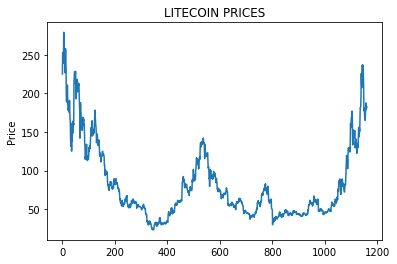

In [3]:
sns.lineplot(data=litecoin['Price'])
plt.title("LITECOIN PRICES")

<AxesSubplot:>

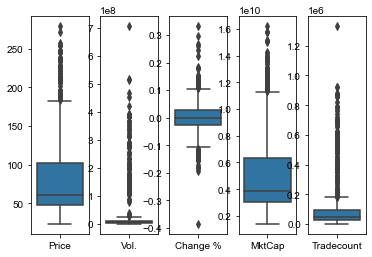

In [4]:
fig, axs = plt.subplots(ncols=5)
sns.set_style("whitegrid")
sns.boxplot(data=litecoin[['Price']],ax=axs[0])
sns.boxplot(data=litecoin[['Vol.']],ax=axs[1])
sns.boxplot(data=litecoin[['Change %']],ax=axs[2])
sns.boxplot(data=litecoin[['MktCap']],ax=axs[3])
sns.boxplot(data=litecoin[['Tradecount']],ax=axs[4])

<AxesSubplot:>

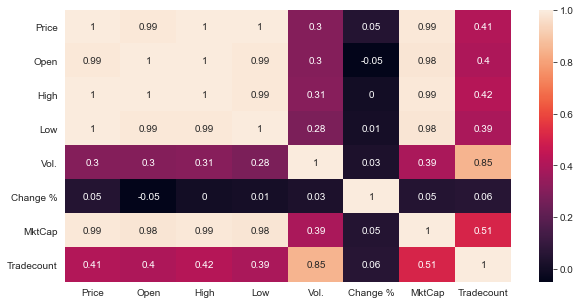

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(litecoin.corr().round(2), annot=True)

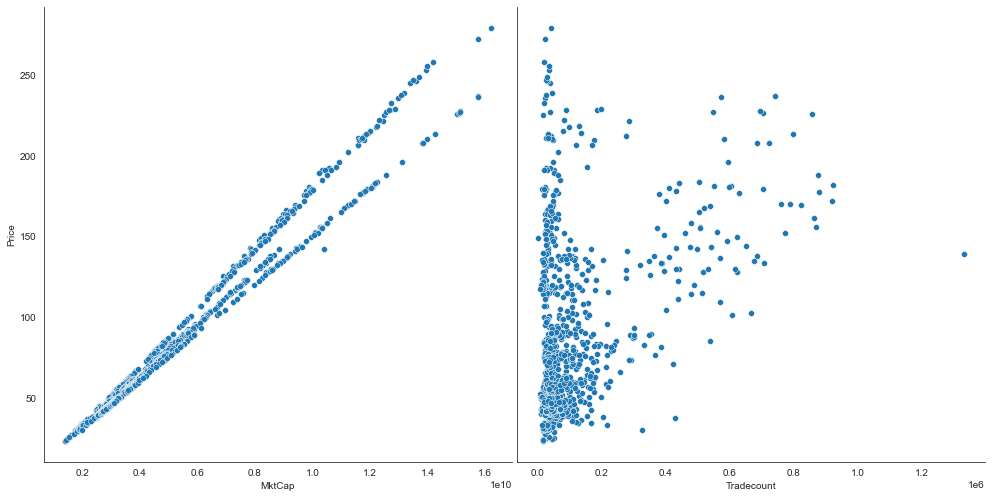

In [6]:
sns.set_style("white")
sns.pairplot(litecoin,x_vars=['MktCap','Tradecount'],y_vars='Price',height=7,kind='scatter',diag_kind=None)

In [7]:
import scipy as scipy
from scipy.stats.mstats import normaltest
print(normaltest(litecoin['Price']))

NormaltestResult(statistic=272.64695977051423, pvalue=6.244029295246138e-60)


In [8]:
from scipy.stats import boxcox

def boxcox_transformation(a):
    boxcox_res=boxcox(a)
    print(boxcox_res)
    boxcox_y=boxcox_res[0] # as it has two outputs one the ransformed array and the lambda used to transform
    return boxcox_y
    
boxcox_litecoin_price=boxcox_transformation(litecoin.Price)

print(normaltest(boxcox_litecoin_price))

(array([2.01697421, 2.0268004 , 2.02406142, ..., 1.99706872, 1.99679771,
       1.99819274]), -0.45322949740397167)
NormaltestResult(statistic=40.88256369905739, pvalue=1.3257574910159126e-09)


# LINEAR REGRESSION

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics

x=litecoin[['MktCap','Tradecount']]
y=boxcox_litecoin_price

lr=LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
mean_mse=np.mean(mse)
print("\nMean Negative square from CV=5")
print(mean_mse)

Mean Absolute Error: 0.022484195189271458
Mean Squared Error: 0.0008584317371088116
Root Mean Squared Error: 0.02929900573584045
INTERCEPT 1.7550748805679668 

COEFS [ 2.56808612e-11 -6.42717813e-08] 

R_SQUARED 0.855448518597863 


Mean Negative square from CV=5
-0.0013224449983445952


           0
344   83.574
345   55.431
346   74.588
347  136.781
348   54.484
              0
344   71.493243
345   53.306201
346   61.137996
347  116.858608
348   52.692032


Text(0.5, 1.0, 'Linear Regression')

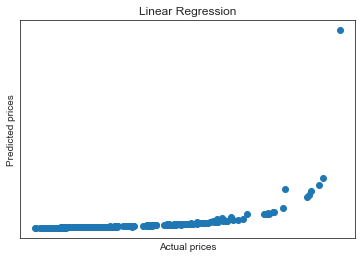

In [10]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.45322949740397167)
price_pred=inv_boxcox(y_pred,-0.45322949740397167)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("Linear Regression")

# HUBBER REGRESSION

In [10]:
#HuberRegressor model;Huber loss is a loss function used in robust regression that is less sensitive to outliers 
#in data than the squared error loss. The Hubber Regressor provided by scikit-learn optimizes the squared loss and
#absolute loss for the samples based on epsilon, where epsilon is a parameter to control the number of samples 
#which should be treated as outliers.

from sklearn.linear_model import HuberRegressor

x=litecoin[['MktCap','Tradecount']]
y=boxcox_litecoin_price

hr=HuberRegressor(alpha=0.0, epsilon=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=hr.fit(x_train,y_train)
y_pred = hr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 0.7750597301393249
Mean Squared Error: 0.7982697540581007
Root Mean Squared Error: 0.8934594305608402
INTERCEPT 1.6840351786524765e-18 

COEFS [ 3.13839899e-10 -5.89080418e-14] 

R_SQUARED -141.72010170439702 


Mean Negative square from CV=5
-0.0013224449983445957


        0
0  47.724
1  56.812
2  72.686
3  82.315
4  53.320
           0
0   3.526380
1   4.921723
2  10.329684
3  12.291075
4   3.592053


Text(0.5, 1.0, 'Hubber Regression')

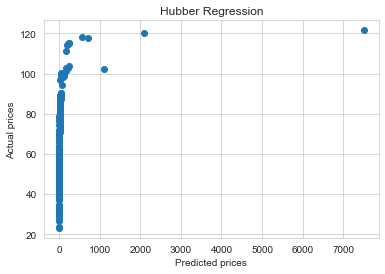

In [11]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.45322949740397167)
price_pred=inv_boxcox(y_pred,-0.45322949740397167)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.head())
print(y_pred_data.head())

plt.scatter(y_pred_data,y_test_data)
plt.xlabel("Predicted prices")
plt.ylabel("Actual prices")
plt.title("Hubber Regression")

# POLYNOMIAL REGRESSION

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x=litecoin[['MktCap','Tradecount']]
y=boxcox_litecoin_price


# TRAINING ERROR PER DEGREE
train_rmse_errors = [] #Saving root mean square for the train set
# TEST ERROR PER DEGREE
test_rmse_errors = [] #Saving root mean square for the test set

for d in range(1,10): #Choose any range you want, the larger the range you test, the more degrees you take into account.
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False) #d is from 1 to 10, we don't want array of 1 as features.
    poly_features = polynomial_converter.fit_transform(x)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred)) #Notice we have y train here
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred)) #Notice we have y test here

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [12]:
train_rmse_errors

[0.027666621204459937,
 0.01296167388695096,
 0.02494244456615063,
 0.035741763438633056,
 0.04431286755657862,
 0.05087364997996343,
 0.05544429549865678,
 0.058734873421849264,
 0.061110582683680935]

In [13]:
test_rmse_errors

[0.02929900573584045,
 0.013403188728009763,
 0.026055190625923562,
 0.03706531243393888,
 0.045705224283722055,
 0.0523912579296803,
 0.05711571519729682,
 0.060580813788627584,
 0.06313709568532208]

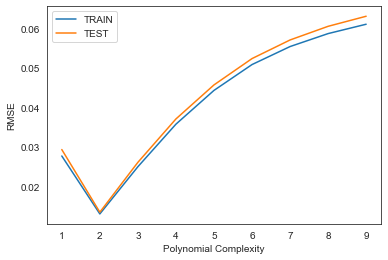

In [14]:
plt.plot(range(1,10),train_rmse_errors[:9],label='TRAIN')
plt.plot(range(1,10),test_rmse_errors[:9],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

#

In [15]:
x=litecoin[['MktCap','Tradecount']]

polynomial_converter = PolynomialFeatures(degree=2)
poly_features = polynomial_converter.fit_transform(x)
y=boxcox_litecoin_price
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3,  random_state=101)
pr = LinearRegression(fit_intercept=True)
model=pr.fit(x_train,y_train)
y_pred = pr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(poly_features,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 0.010003740427201474
Mean Squared Error: 0.00017984777143069261
Root Mean Squared Error: 0.013410733441191522
INTERCEPT 1.6635268916357517 

COEFS [ 0.00000000e+00  6.17747776e-11 -1.20732936e-07 -2.71205381e-21
  8.40613349e-18  1.19406118e-14] 

R_SQUARED 0.9687975818202805 


Mean Negative square from CV=5
-0.0013224449983445952


           0
344   83.574
345   55.431
346   74.588
347  136.781
348   54.484
              0
344   84.887903
345   53.785434
346   66.673833
347  150.845653
348   52.591887


Text(0.5, 1.0, 'Polynomial Regression d=2')

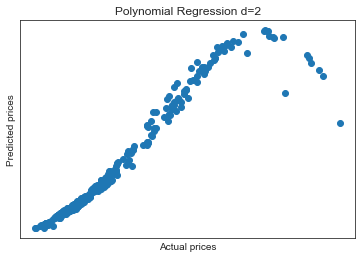

In [16]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.45322949740397167)
price_pred=inv_boxcox(y_pred,-0.45322949740397167)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("Polynomial Regression d=2")

# ELASTICNET

In [17]:
from sklearn.linear_model import ElasticNetCV

x=litecoin[['MktCap','Tradecount']]
y=boxcox_litecoin_price

lr= ElasticNetCV(l1_ratio=0.5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model=lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("INTERCEPT", model.intercept_,"\n")
print("COEFS", model.coef_,"\n")
print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)

Mean Absolute Error: 0.02344312996324248
Mean Squared Error: 0.000873733346713417
Root Mean Squared Error: 0.029558980813171095
INTERCEPT 1.7581843416340481 

COEFS [ 2.37461917e-11 -0.00000000e+00] 

R_SQUARED 0.8462720752415417 


Mean Negative square from CV=5
-0.0010871108300275528


           0
344   83.574
345   55.431
346   74.588
347  136.781
348   54.484
              0
344   72.206068
345   53.951164
346   59.616012
347  142.828694
348   52.882727


Text(0.5, 1.0, 'Elastic Net Regression')

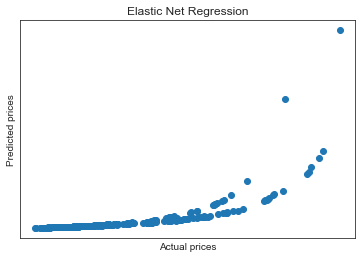

In [18]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.45322949740397167)
price_pred=inv_boxcox(y_pred,-0.45322949740397167)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("Elastic Net Regression")

# KNN

In [19]:
# Grid Search for Parameter Tuning 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import GridSearchCV


x=litecoin[['MktCap','Tradecount']]
y=boxcox_litecoin_price


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
model = KNeighborsRegressor(n_neighbors=10)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
knn = model.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(knn,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)


Mean Absolute Error: 0.006216535875675012
Mean Squared Error: 5.572328697515604e-05
Root Mean Squared Error: 0.007464803210745481
R_SQUARED 0.9916413996707311 


Mean Negative square from CV=5
-0.0002029216719444134


           0
344   83.574
345   55.431
346   74.588
347  136.781
348   54.484
              0
344   89.904870
345   57.900923
346   69.542931
347  151.753798
348   56.065702


Text(0.5, 1.0, 'KNN Regression')

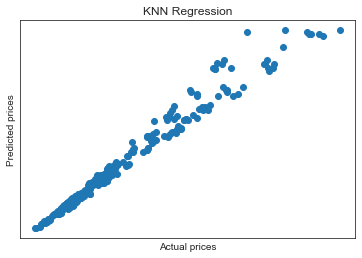

In [20]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.45322949740397167)
price_pred=inv_boxcox(y_pred,-0.45322949740397167)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("KNN Regression")

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

x=litecoin[['MktCap','Tradecount']]
y=boxcox_litecoin_price

# Model for best neighbour
model = RandomForestRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,  random_state=101)
rf = model.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print('\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("R_SQUARED", model.score(x,y),"\n")

mse=cross_val_score(knn,x,y,scoring='neg_mean_squared_error',cv=5) # want cv to find out mean squared err
print("\nMean Negative square from CV=5")
mean_mse=np.mean(mse)
print(mean_mse)


Mean Absolute Error: 0.003151820727212676
Mean Squared Error: 2.2034052436118133e-05
Root Mean Squared Error: 0.004694044358132775
R_SQUARED 0.9983442164382833 


Mean Negative square from CV=5
-0.0002029216719444134


           0
344   83.574
345   55.431
346   74.588
347  136.781
348   54.484
              0
344   88.983272
345   57.340130
346   73.304806
347  137.292501
348   55.152082


Text(0.5, 1.0, 'RandomForest Regression')

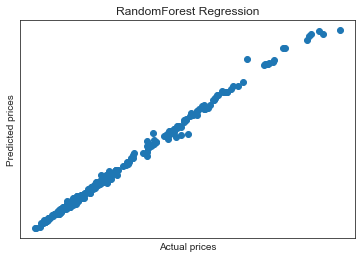

In [22]:
from scipy.special import inv_boxcox
price_test=inv_boxcox(y_test,-0.45322949740397167)
price_pred=inv_boxcox(y_pred,-0.45322949740397167)

y_pred_data = pd.DataFrame(price_pred)
y_test_data = pd.DataFrame(price_test)
print(y_test_data.tail())
print(y_pred_data.tail())

plt.scatter(y_test_data,y_pred_data)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.xticks([])
plt.yticks([])
plt.title("RandomForest Regression")